# Weight Management Project
Exploratory Data Analysis & Hypothesis Testing

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


df = pd.read_csv("weight_mgmt_dataset.csv")
df.head()

,Date,Calories,Protein (g),Fat (g),Carbs (g),Gym (min),Weight (kg)
0,2025-03-01,2309,91,63,344,60,62.8
1,2025-03-02,1690,70,46,249,45,62.8
2,2025-03-03,2434,63,46,442,30,62.5
3,2025-03-04,1683,71,64,205,45,62.4
4,2025-03-05,1420,61,75,125,0,62.5


In [11]:
df.describe().round(2)

,Calories,Protein (g),Fat (g),Carbs (g),Gym (min),Weight (kg)
count,30.00,30.00,30.00,30.00,30.00,30.00
mean,1807.47,89.57,58.23,230.97,21.50,60.70
std,368.32,18.57,11.25,91.04,24.18,1.23
min,1420.00,61.00,41.00,115.00,0.00,59.00
25%,1532.25,73.75,47.25,147.25,0.00,59.70
50%,1668.50,90.50,59.00,222.50,0.00,60.35
75%,2105.25,106.00,67.00,300.75,45.00,61.65
max,2585.00,120.00,75.00,442.00,60.00,62.80


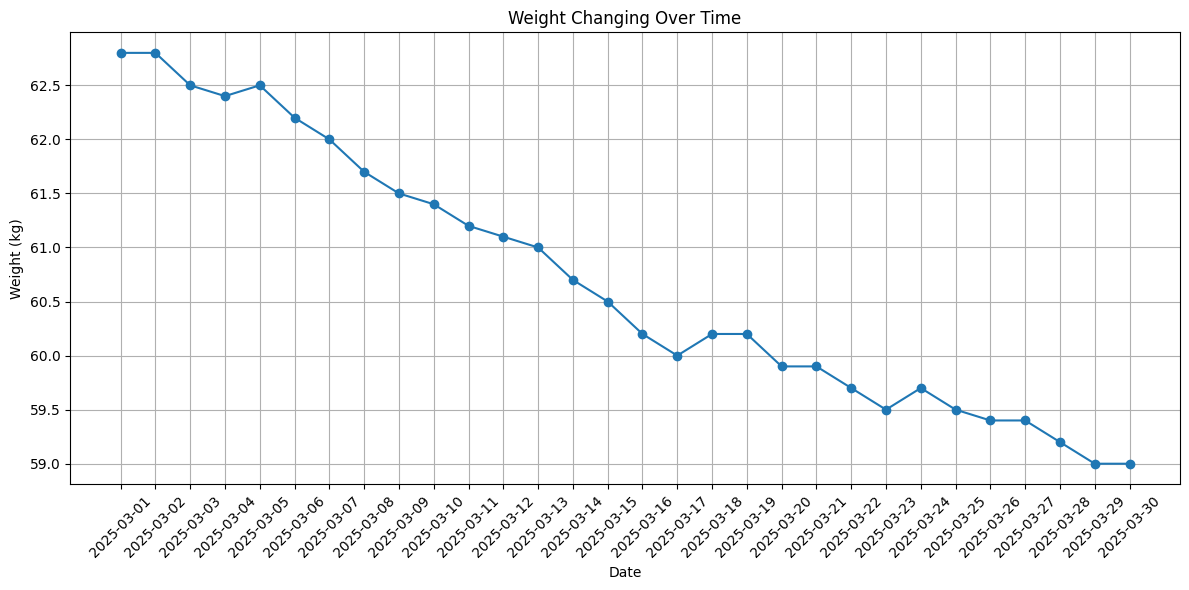

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Weight (kg)'], marker='o')  # sütunun tam adı bu olmalı
plt.xticks(rotation=45)
plt.title('Weight Changing Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.tight_layout()
plt.show()


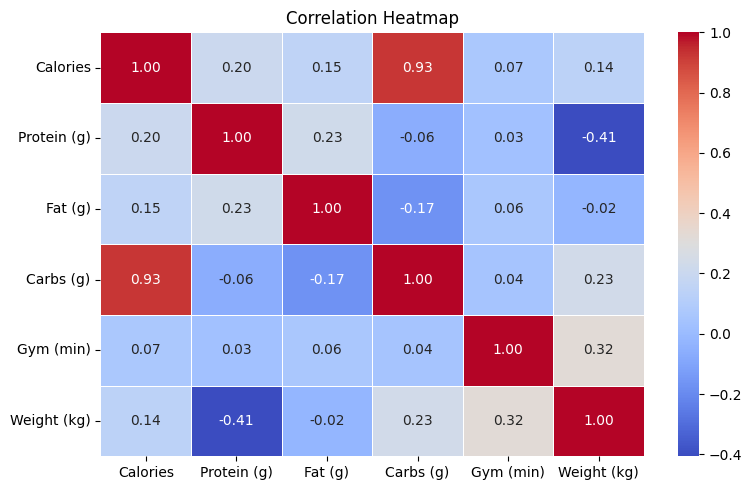

In [14]:
corr = df.drop(columns=['Date']).corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [15]:
gym_days = df[df['Gym (min)'] > 0]['Weight (kg)']
no_gym_days = df[df['Gym (min)'] == 0]['Weight (kg)']

t_stat, p_val = ttest_ind(no_gym_days, gym_days, equal_var=False)
print(f"Average Weight (Gym Days): {gym_days.mean():.2f} kg")
print(f"Average Weight (No-Gym Days): {no_gym_days.mean():.2f} kg")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print('Difference is statistically significant (p < 0.05)')
else:
    print('No statistically significant difference (p >= 0.05)')

Average Weight (Gym Days): 61.08 kg
Average Weight (No-Gym Days): 60.38 kg
T-statistic: -1.597
P-value: 0.1223
No statistically significant difference (p >= 0.05)


**Conclusion:** The exploratory analysis shows a general downward trend in weight. The t-test did not reveal a statistically significant difference between gym and no-gym days, suggesting calorie intake might play a stronger role than gym minutes alone within this short observation window.